## Omnipool Slippage

If $p$ is the effective price and $p_i^j$ is the spot price, we compute effective slippage as
$$
\frac{p}{p_i^j} - 1
$$

Note that $C = \frac{Q_2}{Q_1}$, and $V = \frac{\Delta R_1}{R_1}$.

We get
$$
S = \frac{1}{V}\frac{C(VR_1 - f_T)(1 - f_P)}{C(R_1 + VR_1 - f_T) + (VR_1 - f_T)(1 - f_P)}(1 - f_A) - 1
$$

### $f_T$ negligible compared to transaction size
$$
S = \frac{1 - f_P}{1 + V + \frac{V}{C}(1 - f_P)}(1 - f_A) - 1
$$

### $f_P = f_A$
$$
S = \frac{(1 - f_P)^2}{1 + V + \frac{V}{C}(1 - f_P)} - 1
$$

## Slippage for XYK pool
We define slippage as
$$
S = \frac{p}{p_i^j} - 1
$$

In an XYK pool with the fee deducted from the token leaving the pool, we have
$$
\Delta R_2 = R_2\frac{-\Delta R_1}{R_1 + \Delta R_1}(1 - f)
$$

Thus
$$
p = \frac{R_2}{R_1 + \Delta R_1}(1 - f)\\
p_1^2 = \frac{R_2}{R_1}
$$

So $S = \frac{R_1}{R_1 + \Delta R_1}(1 - f) - 1 = \frac{-\Delta R_1}{R_1} - f\frac{R_1}{R_1 + \Delta R_1}= -V_1 - f\frac{1}{1 + V_1}$

## Effect of multiple tokens on XYK pool slippage
Suppose we have a collection of xyk pools for $n$ tokens. We will denote by $R_i^j$ the amount of asset $i$ in the $i \longleftrightarrow j$ pool.

Then in an $i \to j$ swap, we have $S_i^j = -\frac{\Delta R_i}{R_i^j} - f\frac{R_i^j}{R_i^j + \Delta R_1}$

We will make the simplfying assumption that $R_i^j = \frac{R_i}{n - 1}$. In many ways this is the best case for a collection of xyk pools, since smaller liquidity pools dominate the slippage calculation, so spreading the liquidity of asset $i$ evenly throughout the pools is ideal.

Then
$$
S_i^j = -\frac{\Delta R_i}{R_i^j} - f\frac{R_i^j}{R_i^j + \Delta R_1} = -(n-1)\frac{\Delta R_i}{R_i} - f\frac{R_i}{R_i + (n - 1)\Delta R_i}
= -(n-1)V_i - f\frac{1}{1 + (n - 1)V_i}
$$

## XYK vs Omnipool slippage

Compare this to the slippage calculation for Omnipool under similar assumptions:
$$
S_i^j = \frac{(1 - f/2)^2}{1 + V_i + V_i(1 - f/2)} - 1
\approx \frac{1 - f}{1 + V_i + V_i(1 - f/2)} - 1
= \frac{1}{1 + V_i + V_i(1 - f/2)} - 1 - \frac{f}{1 + V_i + V_i(1 - f/2)}\\
= \frac{(-2 + f/2)V_i }{1 + (2-f/2)V_i} - f\frac{1}{1 + (2-f/2)V_i}
$$

### Ignore fees
Then we get that for xyk,
$$
S_i^j = -(n - 1)V_i
$$
while for Omnipool
$$
S_i^j = \frac{-2V_i }{1 + 2V_i}
$$

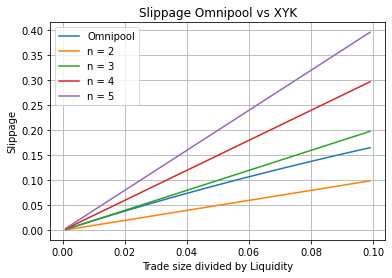

In [15]:
import numpy as np
import matplotlib.pylab as plt

### Graph effective slippage
def slippage_omnipool(v):
    #return -2*v/(1 + 2*v)
    return 2*v/(1 + 2*v)
def slippage_xyk(v, n):
    #return -(n-1)*v
    return (n-1)*v

step_size = 0.001
V_max = 0.1
V = [step_size * i for i in range(1,int(V_max/step_size))]
fig, ax = plt.subplots()

Omnipool_slippage = [slippage_omnipool(v) for v in V]
ax.plot(V, Omnipool_slippage, label='Omnipool')

N = 5
for n in range(2, N+1):
    
    xyk_slippage = [slippage_xyk(v, n) for v in V]

    ax.plot(V, xyk_slippage, label='n = ' + str(n))



ax.set(xlabel='Trade size divided by Liquidity', ylabel='Slippage', autoscale_on=True,
       title='Slippage Omnipool vs XYK')
ax.grid()
ax.legend()
plt.show()